In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
# Load full data 
data = pd.read_csv('../antibody_dataset_1/MITLL_AAlphaBio_Ab_Binding_dataset.csv')

In [7]:
data 

,POI,Sequence,Target,Assay,Replicate,Pred_affinity,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,0.866129,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCHSSQSVGYESRMKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,HSSQSVGYESRMKNSVA,WASTRES,QQYHRLPLS
1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.450543,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKVSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKVSVA,HANTRES,QQYHRLPLS
2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.789996,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,NFTLQSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKNSVA,WASTRES,QQYHRLPLS
3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.704217,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVGYESRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVGYESRNKNSVA,VASTRAS,QQYHRLPLS
4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.625471,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSESVLYQSRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSESVLYQSRNKNSVA,WASTRES,QAYHRLPLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259695,AAYL51_4283,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg2,2,3,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAPSVK,VGRGGHYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259696,AAYL51_4283,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg3,2,3,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAPSVK,VGRGGHYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259697,AAYL51_4284,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg1,2,3,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAGSVK,VGRGGGIFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259698,AAYL51_4284,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg2,2,3,NaN,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAGSVK,VGRGGGIFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV


In [5]:
groupby_columns = ['POI', 'Target']
affinity_column = 'Pred_affinity'

In [6]:
output_df = data.copy()

# Group by 'POI' and 'target', fill NA with median, and set 10 if all values are null 
output_df[affinity_column] = (
    data.groupby(groupby_columns)[affinity_column] 
    .transform(lambda x: x.median() if x.notnull().any() else 10.0) 
) 


In [8]:
output_df 

,POI,Sequence,Target,Assay,Replicate,Pred_affinity,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,0.908478,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCHSSQSVGYESRMKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,HSSQSVGYESRMKNSVA,WASTRES,QQYHRLPLS
1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.450543,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKVSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKVSVA,HANTRES,QQYHRLPLS
2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.793557,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,NFTLQSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKNSVA,WASTRES,QQYHRLPLS
3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.762153,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVGYESRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVGYESRNKNSVA,VASTRAS,QQYHRLPLS
4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,MIT_Target,1,1,1.625471,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSESVLYQSRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSESVLYQSRNKNSVA,WASTRES,QAYHRLPLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259695,AAYL51_4283,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg2,2,3,4.395494,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAPSVK,VGRGGHYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259696,AAYL51_4283,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg3,2,3,4.599686,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAPSVK,VGRGGHYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259697,AAYL51_4284,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg1,2,3,10.000000,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAGSVK,VGRGGGIFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
1259698,AAYL51_4284,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,AlphaNeg2,2,3,4.592221,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYAGSVK,VGRGGGIFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV


In [9]:
ab_data = output_df[['POI', 'Sequence', 'HC', 'LC', 'CDRH1', 'CDRH2', 'CDRH3', 'CDRL1', 'CDRL2', 'CDRL3']].drop_duplicates()

In [10]:
ab_data.to_csv('antibody_info.csv', index=False) 

In [11]:
ab_data

,POI,Sequence,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCHSSQSVGYESRMKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,HSSQSVGYESRMKNSVA,WASTRES,QQYHRLPLS
1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKVSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKVSVA,HANTRES,QQYHRLPLS
2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,NFTLQSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKNSVA,WASTRES,QQYHRLPLS
3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVGYESRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVGYESRNKNSVA,VASTRAS,QQYHRLPLS
4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSESVLYQSRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSESVLYQSRNKNSVA,WASTRES,QAYHRLPLS
...,...,...,...,...,...,...,...,...,...,...
841318,AAYL51_4447,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSTK,VGRGGGYQDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
841328,AAYL51_4438,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSPK,VGRGGGQFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
841329,AAYL51_4436,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSIK,VGRGGGDFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV
841338,AAYL51_444,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADGVK,VGRGGGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV


In [12]:
final_output_df = (
        output_df.groupby(groupby_columns)[affinity_column]
        .mean()
        .reset_index()
    )

In [13]:
final_output_df

,POI,Target,Pred_affinity
0,AAYL49_1,AlphaNeg1,4.947674
1,AAYL49_1,AlphaNeg2,10.000000
2,AAYL49_1,AlphaNeg3,10.000000
3,AAYL49_1,MIT_Target,10.000000
4,AAYL49_10,AlphaNeg1,10.000000
...,...,...,...
419883,MIT_91_LH_scFV,MIT_Target,1.521005
419884,MIT_95_HL_scFV,AlphaNeg1,5.168760
419885,MIT_95_HL_scFV,AlphaNeg2,6.224670
419886,MIT_95_HL_scFV,AlphaNeg3,5.373100


In [14]:
final_output_df.to_csv("avg_affinity_all_targets.csv", index=False) 

In [15]:
antibodies = pd.read_csv("antibody_info.csv") 
avg_affinity_all_targets = pd.read_csv("avg_affinity_all_targets.csv")
target_data = avg_affinity_all_targets[avg_affinity_all_targets['Target']=="MIT_Target"] 
target_data = target_data[target_data['Pred_affinity']!= 10.] 
data_df = pd.merge(antibodies, target_data, on='POI', how='inner')

In [16]:
data_df 

,POI,Sequence,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3,Target,Pred_affinity
0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCHSSQSVGYESRMKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,HSSQSVGYESRMKNSVA,WASTRES,QQYHRLPLS,MIT_Target,0.908478
1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKVSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKVSVA,HANTRES,QQYHRLPLS,MIT_Target,1.450543
2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,NFTLQSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKNSVA,WASTRES,QQYHRLPLS,MIT_Target,1.793557
3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVGYESRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVGYESRNKNSVA,VASTRAS,QQYHRLPLS,MIT_Target,1.762153
4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSESVLYQSRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSESVLYQSRNKNSVA,WASTRES,QAYHRLPLS,MIT_Target,1.625471
...,...,...,...,...,...,...,...,...,...,...,...,...
71829,AAYL51_4423,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSLK,VGRGFGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,3.673940
71830,AAYL51_4447,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSTK,VGRGGGYQDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,4.815116
71831,AAYL51_4438,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSPK,VGRGGGQFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,4.130840
71832,AAYL51_444,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADGVK,VGRGGGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,3.807780


<Axes: >

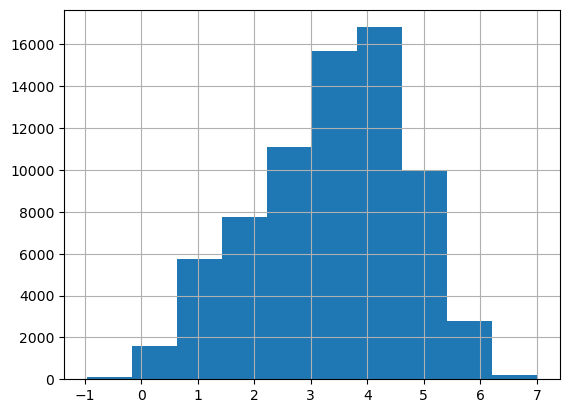

In [17]:
data_df['Pred_affinity'].hist() 

In [18]:
data_df.to_csv('Target_data_preprocessed.csv', index=False)
